In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


excel_data = pd.read_excel('./Dataset/Coca(2015-2022).xlsx')
df = pd.DataFrame(excel_data)
df.head()

,Market,Date,Grade,Arrivals,Unit,Min,Max,Modal,Variety,District
0,MANGALURU,2019-04-01 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
1,MANGALURU,2019-04-02 00:00:00,AVERAGE,227,Quintal,12000,18000,16000,COCA,Dakshina Kannada
2,MANGALURU,2019-04-03 00:00:00,AVERAGE,226,Quintal,12000,18000,16000,COCA,Dakshina Kannada
3,MANGALURU,2019-04-04 00:00:00,AVERAGE,228,Quintal,12000,18000,16000,COCA,Dakshina Kannada
4,MANGALURU,2019-04-05 00:00:00,AVERAGE,231,Quintal,12000,18000,16000,COCA,Dakshina Kannada


In [2]:
df.isna().sum()

Market      0
Date        0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
Variety     0
District    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    1867 non-null   object
 1   Date      1867 non-null   object
 2   Grade     1867 non-null   object
 3   Arrivals  1867 non-null   int64 
 4   Unit      1867 non-null   object
 5   Min       1867 non-null   int64 
 6   Max       1867 non-null   int64 
 7   Modal     1867 non-null   int64 
 8   Variety   1867 non-null   object
 9   District  1867 non-null   object
dtypes: int64(4), object(6)
memory usage: 146.0+ KB


In [4]:
df_test = df
df_test['Date']=pd.to_datetime(df['Date'])

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    1867 non-null   object        
 1   Date      1867 non-null   datetime64[ns]
 2   Grade     1867 non-null   object        
 3   Arrivals  1867 non-null   int64         
 4   Unit      1867 non-null   object        
 5   Min       1867 non-null   int64         
 6   Max       1867 non-null   int64         
 7   Modal     1867 non-null   int64         
 8   Variety   1867 non-null   object        
 9   District  1867 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 146.0+ KB


In [6]:
df_test.sort_values(by='Date',inplace=True)

In [7]:
df_test = df[['Date','Arrivals','Min','Max','Modal']]
df_test

,Date,Arrivals,Min,Max,Modal
801,2015-01-01,53,8900,16000,14000
802,2015-01-02,55,8900,16000,14000
803,2015-01-03,55,8900,16000,14000
804,2015-01-05,58,8900,16000,14000
805,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
1862,2022-11-04,263,25000,34000,30000
1863,2022-11-05,2900,20000,25000,24000
1864,2022-12-01,35,26000,31000,30800
1865,2022-12-04,962,22600,30400,27000


In [8]:
df_test.index = df_test['Date']
df_test

,Date,Arrivals,Min,Max,Modal
Date,,,,,
2015-01-01,2015-01-01,53,8900,16000,14000
2015-01-02,2015-01-02,55,8900,16000,14000
2015-01-03,2015-01-03,55,8900,16000,14000
2015-01-05,2015-01-05,58,8900,16000,14000
2015-01-06,2015-01-06,40,8900,16000,14000
...,...,...,...,...,...
2022-11-04,2022-11-04,263,25000,34000,30000
2022-11-05,2022-11-05,2900,20000,25000,24000
2022-12-01,2022-12-01,35,26000,31000,30800


In [9]:
df_test.drop('Date',axis=1,inplace=True)
df_test

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_18724\1244294919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('Date',axis=1,inplace=True)


,Arrivals,Min,Max,Modal
Date,,,,
2015-01-01,53,8900,16000,14000
2015-01-02,55,8900,16000,14000
2015-01-03,55,8900,16000,14000
2015-01-05,58,8900,16000,14000
2015-01-06,40,8900,16000,14000
...,...,...,...,...
2022-11-04,263,25000,34000,30000
2022-11-05,2900,20000,25000,24000
2022-12-01,35,26000,31000,30800


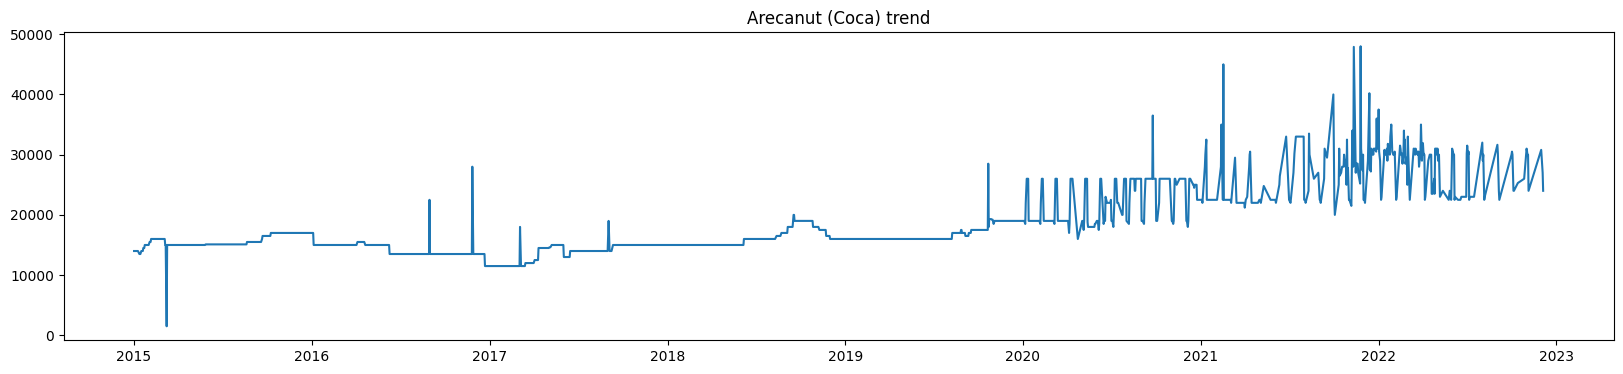

In [10]:
plt.figure(figsize=(20,4))
plt.plot(df_test['Modal'])
plt.title('Arecanut (Coca) trend')
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler_coca = MinMaxScaler(feature_range=(0,1))

In [12]:
# Define the columns you want to scale
columns_to_scale = ['Arrivals', 'Min', 'Max', 'Modal']

# Apply MinMaxScaler to the selected columns
df_test[columns_to_scale] = scaler_coca.fit_transform(df_test[columns_to_scale])

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_18724\177490449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[columns_to_scale] = scaler_coca.fit_transform(df_test[columns_to_scale])


In [13]:
df_test

,Arrivals,Min,Max,Modal
Date,,,,
2015-01-01,0.001429,0.194301,0.026455,0.268817
2015-01-02,0.001486,0.194301,0.026455,0.268817
2015-01-03,0.001486,0.194301,0.026455,0.268817
2015-01-05,0.001572,0.194301,0.026455,0.268817
2015-01-06,0.001057,0.194301,0.026455,0.268817
...,...,...,...,...
2022-11-04,0.007429,0.611399,0.502646,0.612903
2022-11-05,0.082779,0.481865,0.264550,0.483871
2022-12-01,0.000914,0.637306,0.423280,0.630108


In [14]:
def df_to_X_y(df, window_size=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][1], df_as_np[i+window_size][2], df_as_np[i+window_size][3] 
        y.append(label)
    return np.array(X), np.array(y)

In [19]:
WINDOW_SIZE = 10 
X_coca, y_coca= df_to_X_y(df_test,WINDOW_SIZE)
X_coca.shape, y_coca.shape

((1857, 10, 4), (1857, 3))

In [20]:
train_size = int(len(df_test)*0.8)
val_size = int((len(df_test) - train_size)*0.7)
test_size = len(df_test) - (train_size + val_size)

print(train_size, val_size ,test_size)

1493 261 113


In [21]:
X_train, y_train = X_coca[:1500], y_coca[:1500]
X_val, y_val = X_coca[1500:1800], y_coca[1500:1800]
X_test, y_tesst = X_coca[1800:] ,y_coca[1800:] 

In [22]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_tesst.shape

((1500, 10, 4), (1500, 3), (300, 10, 4), (300, 3), (57, 10, 4), (57, 3))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense,Conv1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [16]:
model_coca= Sequential()
model_coca.add(InputLayer((10,4))),
model_coca.add(LSTM(64)),
model_coca.add(Dense(64, 'relu')),
model_coca.add(Dense(30, 'relu')),
model_coca.add(Dense(3))

model_coca.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17664     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 30)                1950      
                                                                 
 dense_2 (Dense)             (None, 3)                 93        
                                                                 
Total params: 23867 (93.23 KB)
Trainable params: 23867 (93.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model_coca.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

In [23]:
hist_coca = model_coca.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=2)

Epoch 1/50
47/47 - 3s - loss: 0.0364 - mean_absolute_error: 0.1714 - val_loss: 0.1274 - val_mean_absolute_error: 0.3272 - 3s/epoch - 69ms/step
Epoch 2/50
47/47 - 0s - loss: 0.0091 - mean_absolute_error: 0.0753 - val_loss: 0.0394 - val_mean_absolute_error: 0.1414 - 466ms/epoch - 10ms/step
Epoch 3/50
47/47 - 0s - loss: 0.0017 - mean_absolute_error: 0.0296 - val_loss: 0.0324 - val_mean_absolute_error: 0.1234 - 472ms/epoch - 10ms/step
Epoch 4/50
47/47 - 0s - loss: 0.0016 - mean_absolute_error: 0.0283 - val_loss: 0.0301 - val_mean_absolute_error: 0.1182 - 445ms/epoch - 9ms/step
Epoch 5/50
47/47 - 0s - loss: 0.0015 - mean_absolute_error: 0.0274 - val_loss: 0.0284 - val_mean_absolute_error: 0.1139 - 473ms/epoch - 10ms/step
Epoch 6/50
47/47 - 0s - loss: 0.0014 - mean_absolute_error: 0.0264 - val_loss: 0.0264 - val_mean_absolute_error: 0.1093 - 396ms/epoch - 8ms/step
Epoch 7/50
47/47 - 0s - loss: 0.0013 - mean_absolute_error: 0.0253 - val_loss: 0.0245 - val_mean_absolute_error: 0.1046 - 377ms/e

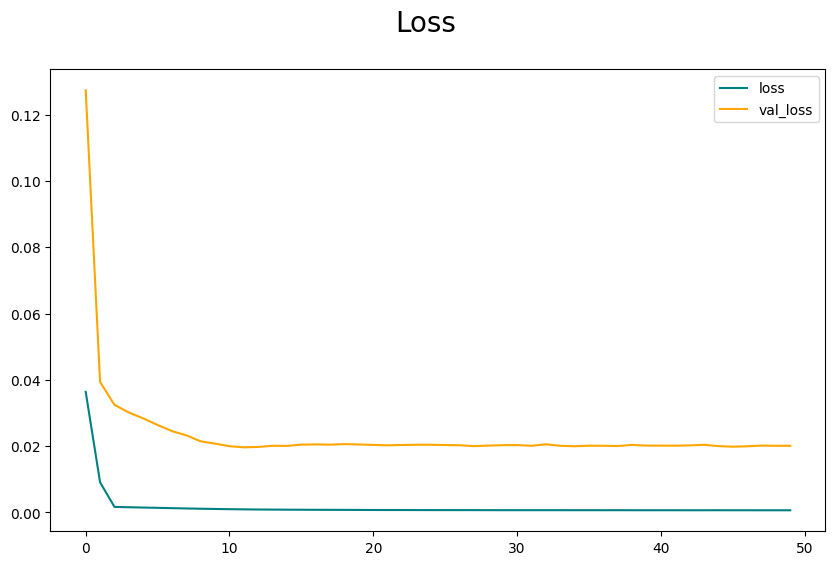

In [24]:
g = plt.figure(figsize=(10,6))
plt.plot(hist_coca.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_coca.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [36]:
model_coca.save('./models/Coca/model_coca.h5')

In [25]:
train_prediction = model_coca.predict(X_train, verbose=0)

In [26]:
train_prediction.shape

(1500, 3)

In [27]:
y_train.shape

(1500, 3)

In [28]:
train_results = pd.DataFrame({'Train_prediction_Min': train_prediction[:, 0],
                                'Actual_Min': y_train[:, 0],
                              'Train_prediction_Max': train_prediction[:, 1],
                                'Actual_Max': y_train[:, 1],
                              'Train_prediction_Modal': train_prediction[:, 2],
                                'Actual_Modal': y_train[:, 2]})

In [29]:
train_results

,Train_prediction_Min,Actual_Min,Train_prediction_Max,Actual_Max,Train_prediction_Modal,Actual_Modal
0,0.196014,0.194301,0.031172,0.026455,0.263405,0.258065
1,0.196000,0.194301,0.030982,0.039683,0.262446,0.268817
2,0.195825,0.194301,0.033168,0.039683,0.263438,0.268817
3,0.195764,0.194301,0.035008,0.039683,0.264138,0.268817
4,0.195786,0.191710,0.036621,0.039683,0.264700,0.279570
...,...,...,...,...,...,...
1495,0.503876,0.378238,0.299972,0.317460,0.484455,0.526882
1496,0.486227,0.585492,0.304307,0.343915,0.484230,0.526882
1497,0.491365,0.481865,0.305549,0.343915,0.489239,0.526882
1498,0.484379,0.481865,0.307653,0.317460,0.491729,0.526882


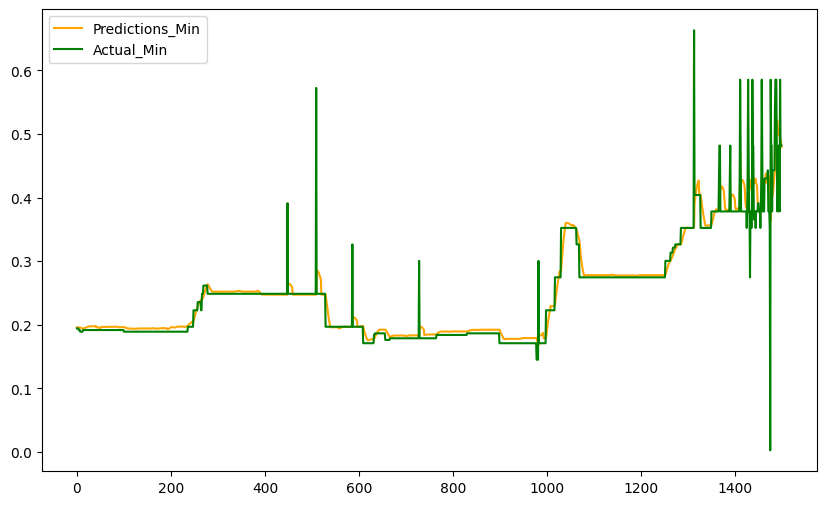

In [30]:
plt.figure(figsize=(10,6))
plt.plot(train_results['Train_prediction_Min'][:],color='orange',label='Predictions_Min')
plt.plot(train_results['Actual_Min'][:],color='green',label='Actual_Min')
plt.legend(loc='upper left')
plt.show()

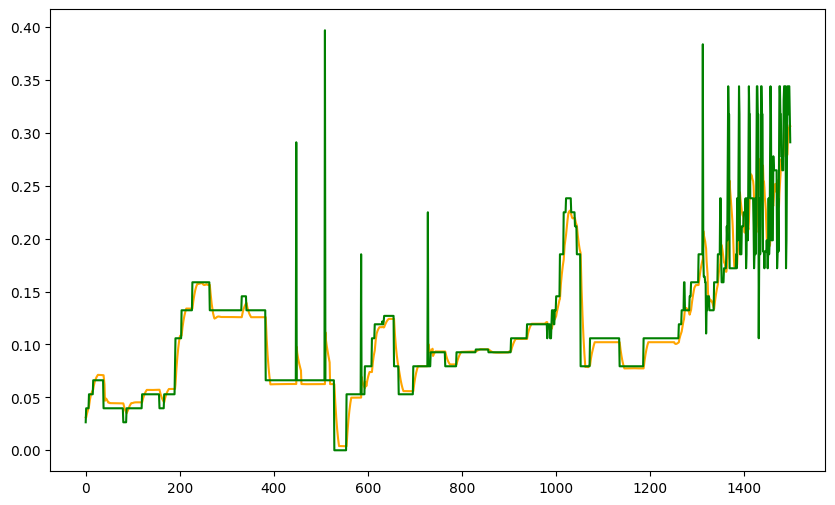

In [31]:
plt.figure(figsize=(10,6))
plt.plot(train_results['Train_prediction_Max'][:],color='orange',label='Predictions_Max')
plt.plot(train_results['Actual_Max'][:],color='green',label='Actual_Max')

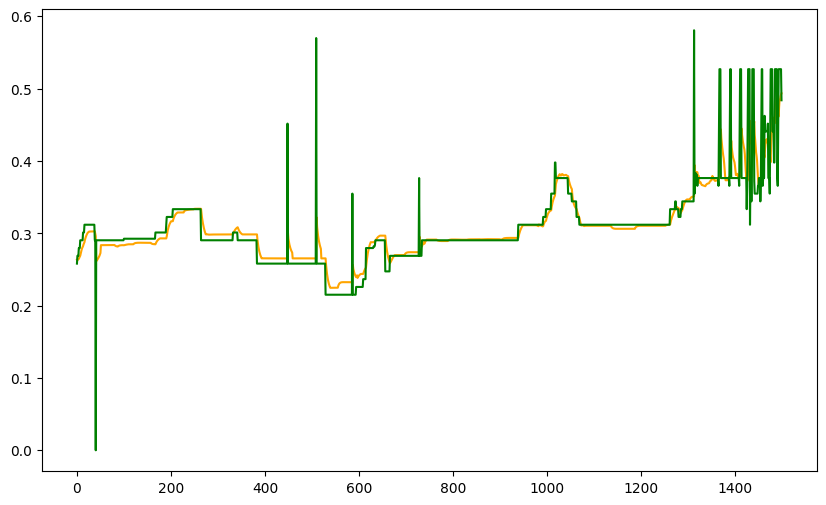

In [32]:
plt.figure(figsize=(10,6))
plt.plot(train_results['Train_prediction_Modal'][:],color='orange',label='Predictions_Modal')
plt.plot(train_results['Actual_Modal'][:],color='green',label='Actual_Modal')

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_train,train_prediction)
mae

0.011005259243956914

In [34]:
r2 = r2_score(y_train,train_prediction)
r2*100

83.98667728672238